### CS559 - Homework #5

**Author**: Sid Bhatia

**Date**: November 15, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. In Suk Jang

#### 1. Unsupervised Learning [65 pts]

Supervised learning techniques cannot be applied when a given data set does not have feature names or
unknown targets. Instead, we can apply unsupervised learning techniques such as clustering analysis or
dimensionality reduction to learn about the hidden structures of the data set. Sometimes, such methods
can be applied in EDA or preprocessing the training data to build a supervised learning model. In this
question, we will practice implementing, fitting, and analyzing unsupervised learning algorithms.

### 1.1 Clustering Analysis [40 pts]

a. Load the provided data - autompg.csv. The data contains seven columns; the target is mpg.
This data set can be used for both classification and regression problems.

In [ ]:
import pandas as pd

file_path = 'autompg.csv'
auto_mpg_df = pd.read_csv(file_path)

print("Dataset Preview:")
print(auto_mpg_df.head())

print("\nDataset Information:")
auto_mpg_df.info()

Dataset Preview:
    mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int6

In [ ]:
print("\nSummary Statistics:")
print(auto_mpg_df.describe())

print("\nMissing Values:")
print(auto_mpg_df.isnull().sum())


Summary Statistics:
              mpg   cylinders  displacement  horsepower       weight   
count  398.000000  398.000000    398.000000  396.000000   398.000000  \
mean    23.514573    5.454774    193.425879  104.189394  2970.424623   
std      7.815984    1.701004    104.269838   38.402030   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   92.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model-year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  

Missing Values:
mpg    

In [5]:
print("\nColumn Names:")
print(auto_mpg_df.columns)


Column Names:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model-year'],
      dtype='object')


b. [5 pts] Relabel mpg into three ordinal domains [good (2), average (1), bad (0)] by calculating
the quantiles using numpy.quantitle. For other continuous columns, convert to four ordinal
categorical features as (4) - high, (3) - good, (2) - okay, (1) - poor.

In [6]:
import numpy as np

mpg_quantiles = np.quantile(auto_mpg_df['mpg'], [0.33, 0.67])

def relabel_mpg(value):
    if value <= mpg_quantiles[0]:
        return 0  # bad
    elif value <= mpg_quantiles[1]:
        return 1  # average
    else:
        return 2  # good

auto_mpg_df['mpg_category'] = auto_mpg_df['mpg'].apply(relabel_mpg)

continuous_columns = auto_mpg_df.select_dtypes(include=['float64', 'int64']).columns.drop('mpg')

def relabel_continuous(value, quantiles):
    if value <= quantiles[0]:
        return 1  # poor
    elif value <= quantiles[1]:
        return 2  # okay
    elif value <= quantiles[2]:
        return 3  # good
    else:
        return 4  # high

for column in continuous_columns:
    quantiles = np.quantile(auto_mpg_df[column], [0.25, 0.5, 0.75])
    auto_mpg_df[f'{column}_category'] = auto_mpg_df[column].apply(lambda x: relabel_continuous(x, quantiles))

In [9]:
print("\nUpdated Dataset with Ordinal Categories:")
print(auto_mpg_df.head())


Updated Dataset with Ordinal Categories:
    mpg  cylinders  displacement  horsepower  weight  acceleration   
0  18.0          8         307.0       130.0    3504          12.0  \
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model-year  mpg_category  cylinders_category  displacement_category   
0          70             0                   3                      4  \
1          70             0                   3                      4   
2          70             0                   3                      4   
3          70             0                   3                      4   
4          70             0                   3                      4   

   horsepower_category  weight_category  acceleration_category   
0                    4    

In [12]:
auto_mpg_df = auto_mpg_df.drop(columns=['mpg_category_category'])

print("\nCleaned Dataset:")
print(auto_mpg_df.head())


Cleaned Dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration   
0  18.0          8         307.0       130.0    3504          12.0  \
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model-year  mpg_category  cylinders_category  displacement_category   
0          70             0                   3                      4  \
1          70             0                   3                      4   
2          70             0                   3                      4   
3          70             0                   3                      4   
4          70             0                   3                      4   

   horsepower_category  weight_category  acceleration_category   
0                    4                3           

In [13]:
print("MPG Quantiles (33%, 67%):", mpg_quantiles)

print(auto_mpg_df[['mpg', 'mpg_category']].head(10))

MPG Quantiles (33%, 67%): [19. 27.]
    mpg  mpg_category
0  18.0             0
1  15.0             0
2  18.0             0
3  16.0             0
4  17.0             0
5  15.0             0
6  14.0             0
7  14.0             0
8  14.0             0
9  15.0             0


In [ ]:
print("\nRows with mpg_category == 1 (average):")
print(auto_mpg_df[auto_mpg_df['mpg_category'] == 1].head())


Rows with mpg_category == 1 (average):
     mpg  cylinders  displacement  horsepower  weight  acceleration   
14  24.0          4         113.0        95.0    2372          15.0  \
15  22.0          6         198.0        95.0    2833          15.5   
17  21.0          6         200.0        85.0    2587          16.0   
18  27.0          4          97.0        88.0    2130          14.5   
19  26.0          4          97.0        46.0    1835          20.5   

    model-year  mpg_category  cylinders_category  displacement_category   
14          70             1                   1                      2  \
15          70             1                   3                      3   
17          70             1                   3                      3   
18          70             1                   1                      1   
19          70             1                   1                      1   

    horsepower_category  weight_category  acceleration_category   
14             

In [15]:
print("\nRows with mpg_category == 2 (good):")
print(auto_mpg_df[auto_mpg_df['mpg_category'] == 2].head())


Rows with mpg_category == 2 (good):
     mpg  cylinders  displacement  horsepower  weight  acceleration   
30  28.0          4         140.0        90.0    2264          15.5  \
50  28.0          4         116.0        90.0    2123          14.0   
51  30.0          4          79.0        70.0    2074          19.5   
52  30.0          4          88.0        76.0    2065          14.5   
53  31.0          4          71.0        65.0    1773          19.0   

    model-year  mpg_category  cylinders_category  displacement_category   
30          71             2                   1                      2  \
50          71             2                   1                      2   
51          71             2                   1                      1   
52          71             2                   1                      1   
53          71             2                   1                      1   

    horsepower_category  weight_category  acceleration_category   
30                

c. [10 pts] Implement a myKmean(X, k, iter) algorithm as a function (not a class) using only NumPy.
The parameter X is the data, k is the number of clusters, and iter is the number of iterations. The
function returns the final cluster labels, the centroid of clusters, and the total variance of the
algorithm.

In [16]:
def myKmean(X, k, iter):
    np.random.seed(42)

    initial_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[initial_indices]
    
    for _ in range(iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i]
                                   for i in range(k)])
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    total_variance = sum(np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(k))
    
    return labels, centroids, total_variance

d. [10 pts] Determine the appropriate k value of the new data set using myKmean. Show that the
total variance converges as k increases.

k=1, Total Variance=2679.65
k=2, Total Variance=1299.39
k=3, Total Variance=1041.71
k=4, Total Variance=790.36
k=5, Total Variance=721.94
k=6, Total Variance=642.62
k=7, Total Variance=611.70
k=8, Total Variance=539.92
k=9, Total Variance=492.19
k=10, Total Variance=480.36


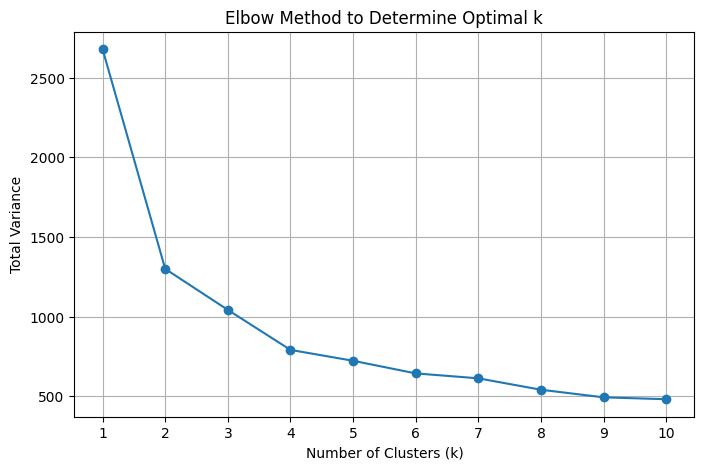

In [ ]:
ordinal_columns = [col for col in auto_mpg_df.columns if '_category' in col]
X = auto_mpg_df[ordinal_columns].to_numpy()

k_values, variances = [], []

for k in range(1, 11):
    _, _, total_variance = myKmean(X, k, iter=10)
    k_values.append(k)
    variances.append(total_variance)
    print(f"k={k}, Total Variance={total_variance:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, variances, marker='o')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Total Variance")
plt.xticks(k_values)
plt.grid()
plt.show()

The optimal $k$ is at the *elbow point*, the point where the curve starts flattening out significantly. The total variance decreases sharply between $k = 1$ and $k = 3$. After $k = 3$, the rate of decrease in total variance slows down significantly. Therefore, $\textbf{k = 3}$ is the appropriate $k$ value.

f. [15 pts] Using the results of myKmean with the best k value from d, build a linear classification
model using scikit-learn that predicts the cluster label. Discuss any noticeable characteristics in
each cluster. Guess any features that are correlated to each other based on the weight values.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        53

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 1.0

Feature Weights (Influence on Clusters):
                 Feature    Weight  Weight_Abs
6    model-year_category -2.249813    2.249813
1     cylinders_category -1.039157    1.039157
2  displacement_category -0.802899    0.802899
4        weight_category -0.295275    0.295275
5  acceleration_category  0.160412    0.160412
0           mpg_category -0.016134    0.016134
3    horsepower_category  0.000510    0.000510


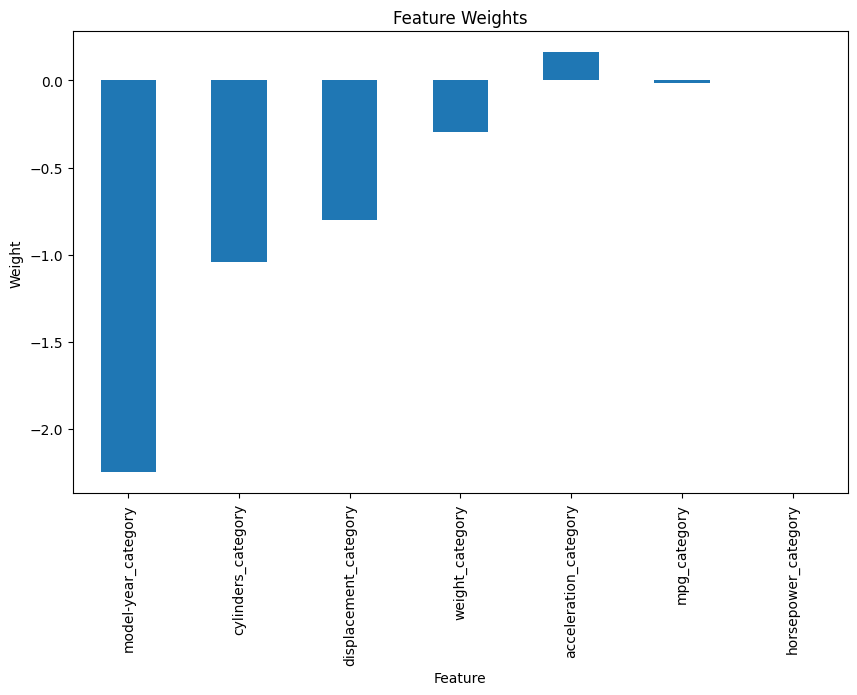

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

k = 3
labels, centroids, _ = myKmean(X, k, iter=10)

auto_mpg_df['cluster_label'] = labels

features = ordinal_columns
target = 'cluster_label'

X = auto_mpg_df[features].to_numpy()
y = auto_mpg_df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

weights = pd.DataFrame({'Feature': features, 'Weight': model.coef_[0]})
weights['Weight_Abs'] = weights['Weight'].abs()
weights = weights.sort_values(by='Weight_Abs', ascending=False)

print("\nFeature Weights (Influence on Clusters):")
print(weights)

weights.plot(x='Feature', y='Weight', kind='bar', figsize=(10, 6), legend=False, title="Feature Weights")
plt.ylabel("Weight")
plt.show()

#### Discussion of Cluster Characteristics

##### Cluster Separation

The model achieves **perfect accuracy (1.0)**, indicating that the clusters are well-separated based on the provided features. This suggests that the features selected (ordinal categories of various vehicle characteristics) are effective for distinguishing between clusters.

##### Most Influential Features
- **Model-Year Category:**
  - This feature has the highest absolute weight ($-2.249813$), making it the most influential in determining cluster labels.
  - Older model years are likely assigned to one cluster, while newer model years are assigned to another cluster.

- **Cylinders Category:**
  - Significant weight ($-1.039157$) suggests that the number of cylinders strongly differentiates clusters.
  - Vehicles with fewer cylinders are likely in clusters associated with higher fuel efficiency (`mpg`).

- **Displacement Category:**
  - Weight of $-0.802899$ indicates that engine displacement (size) is a strong predictor of cluster membership.
  - Larger engines are likely associated with lower `mpg`.

- **Weight Category:**
  - Moderate weight ($-0.295275$) shows that vehicle weight influences cluster assignment.
  - Heavier vehicles are likely assigned to clusters with lower `mpg`.

##### Less Influential Features
- **Acceleration Category** and **MPG Category:**
  - Lower weights ($0.160412$ and $-0.016134$, respectively) suggest these features have minimal influence on cluster distinctions.

- **Horsepower Category:**
  - Very low weight ($0.000510$) indicates it has negligible impact on the clustering.

##### Notable Cluster Characteristics
Based on the influential features:
- **Cluster 0** (likely low `mpg` vehicles):
  - Older vehicles with higher cylinders, larger displacement, and heavier weight.
- **Cluster 1** (likely mid-range `mpg` vehicles):
  - Intermediate features in terms of model year, cylinders, displacement, and weight.
- **Cluster 2** (likely high `mpg` vehicles):
  - Newer vehicles with fewer cylinders, smaller displacement, and lighter weight.

##### Guessed Feature Correlations
1. **Positive Correlations:**
   - **Cylinders Category** and **Displacement Category:**
     - Larger engines (higher displacement) often come with more cylinders.
   - **Weight Category** and **Displacement Category:**
     - Heavier vehicles often have larger engines, leading to a correlation between weight and displacement.

2. **Negative Correlations:**
   - **MPG Category** with:
     - Cylinders, Displacement, and Weight categories.
     - Higher `mpg` (fuel efficiency) is typically associated with fewer cylinders, smaller engines, and lighter weight.

3. **Weak Correlations:**
   - **Acceleration Category** and other features:
     - Acceleration likely has weak or indirect correlations with other features, as seen by its low weight in the model.

e. Save the data set and the cluster label. It will used in the BN problem.

In [21]:
output_file_path = './auto_mpg_with_clusters.csv'
auto_mpg_df.to_csv(output_file_path, index=False)

### 1.2 Dimensionality Reduction [25 pts]

a. Load the provided data, pca_data.csv.

In [22]:
file_path = 'pca_data.csv'
pca_data_df = pd.read_csv(file_path)

b. [10 pts] Study the data and hypothesize the appropriate number of dimensions (n) that the data
can be reduced to. Use statistics and visualizations to support your answer.

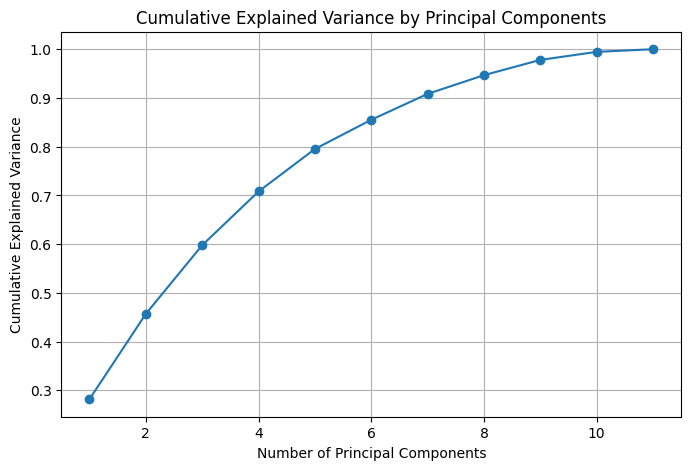

(array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
        0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
        0.00541439]),
 array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
        0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
        1.        ]))

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data_df.drop('quality', axis=1))

pca = PCA()
pca.fit(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance_ratio, cumulative_variance_ratio

#### Hypothesizing the Number of Dimensions $n$ to Reduce To

##### Key Observations from the PCA Analysis

1. **Explained Variance Ratio**:
   - The first principal component explains approximately **28.17%** of the variance.
   - The second principal component adds another **17.51%**, bringing the cumulative variance explained to approximately **45.68%**.
   - The first **four principal components** explain around **70.8%** of the variance.
   - The first **six principal components** explain around **85.5%** of the variance.

2. **Elbow in the Cumulative Variance Plot**:
   - The cumulative variance curve shows a significant "elbow" around **four components**.
   - Beyond this point, adding more components contributes less to the cumulative variance.

##### Hypothesis for Dimensionality Reduction

- **Optimal Dimensions (\(n\)):**
  - Based on the cumulative explained variance and the "elbow" point, the data can be reduced to **4 dimensions** without significant loss of information.
  - These 4 principal components account for approximately **70.8%** of the variance, which is sufficient for most practical purposes.

##### Supporting Insights

1. Reducing to **4 dimensions** balances information retention with dimensionality reduction.
2. Further reduction (e.g., to 3 components) would sacrifice a significant amount of variance (about 11.1%).

c. [10 pts] Implement a function myPCA(X,n)(no class) that takes the data X and n is the number
of components found in b. The function will return the principal components.

In [24]:
def myPCA(X, n):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    covariance_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = sorted_eigenvectors[:, :n]

    principal_components = np.dot(X_centered, top_eigenvectors)

    return principal_components

d. [5 pts] Perform myPCA and compare the result with scikit-learn PCA.

In [25]:
from sklearn.decomposition import PCA

n_components = 4 
my_pca_result = myPCA(scaled_data, n_components)

sklearn_pca = PCA(n_components=n_components)
sklearn_pca_result = sklearn_pca.fit_transform(scaled_data)

comparison_df = pd.DataFrame({
    "MyPCA_Component1": my_pca_result[:, 0],
    "SklearnPCA_Component1": sklearn_pca_result[:, 0],
    "Difference_Component1": my_pca_result[:, 0] - sklearn_pca_result[:, 0]
})

comparison_df.head(10)

,MyPCA_Component1,SklearnPCA_Component1,Difference_Component1
0,1.619530,-1.619530,3.239060
1,0.799170,-0.799170,1.598340
2,0.748479,-0.748479,1.496958
3,-2.357673,2.357673,-4.715345
4,1.619530,-1.619530,3.239060
5,1.583707,-1.583707,3.167415
6,1.101464,-1.101464,2.202928
7,2.248708,-2.248708,4.497415
8,1.086887,-1.086887,2.173773
9,-0.654790,0.654790,-1.309579


#### Comparison Between `myPCA` and scikit-learn PCA

##### Observation
- The first principal components obtained from `myPCA` and scikit-learn's PCA are **equal in magnitude** but have **opposite signs**. 
- For example:
  - `myPCA`: $1.619530$
  - scikit-learn PCA: $-1.619530$
  - Difference: $1.619530 - (-1.619530) = 3.239060$

- This difference is due to the fact that eigenvectors, which define the principal components, can point in either direction in the eigenspace without altering their validity.

##### Conclusion
- The signs of eigenvectors are mathematically arbitrary. Therefore, a difference in sign between the results of `myPCA` and scikit-learn PCA does not affect the interpretation or utility of the PCA results and are functionally equivalent.

### 2. Bayes Network [35 pts]

In this problem, we will build a BN model that predicts the cluster labels. We will practice making
conditional independence assumptions and building a model based on the assumptions. The table below
is to

| Variable         | mpg | cylinders | displacement | horsepower | weight | acceleration | model-year | cluster label |
|------------------|-----|-----------|--------------|------------|--------|--------------|------------|---------------|
| **Denotation**   | M   | C         | D            | H          | W      | A            | Y          | L             |

a. [10 pts] Assume the following BN model. Draw the layout of the graph and construct the conditional
probability tables.

$$
P(L, M, W, C) = P(L \mid M, W, C) P(M \mid W) P(M \mid C) P(W \mid C) P(C) P(Y \mid C) P(A \mid Y) P(A \mid C)
$$